In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
from random import randint

In [3]:
df=pd.read_csv('output.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PatientID           4041 non-null   int64 
 1   Age                 4041 non-null   int64 
 2   Sex                 4041 non-null   object
 3   Height              4041 non-null   int64 
 4   Weight              4041 non-null   int64 
 5   Prior_BP_issues     4041 non-null   object
 6   Prior_heart_issues  4041 non-null   object
 7   Prior_resp_issues   4041 non-null   object
 8   Heartrate           4041 non-null   int64 
 9   Spo2                4041 non-null   int64 
 10  Overdose            4041 non-null   object
dtypes: int64(6), object(5)
memory usage: 347.4+ KB


In [4]:
df.head()

,PatientID,Age,Sex,Height,Weight,Prior_BP_issues,Prior_heart_issues,Prior_resp_issues,Heartrate,Spo2,Overdose
0,5000,30,F,174,87,No,No,No,68,97,No
1,5001,29,M,182,96,No,No,No,58,98,No
2,5002,25,M,184,75,No,Yes,No,49,94,No
3,5003,20,M,187,112,No,No,Yes,82,96,No
4,5004,28,F,153,46,No,No,No,57,97,No


In [5]:
df= df.drop(columns = ['PatientID'])

In [6]:
df.head

<bound method NDFrame.head of       Age Sex  Height  Weight Prior_BP_issues Prior_heart_issues  \
0      30   F     174      87              No                 No   
1      29   M     182      96              No                 No   
2      25   M     184      75              No                Yes   
3      20   M     187     112              No                 No   
4      28   F     153      46              No                 No   
...   ...  ..     ...     ...             ...                ...   
4036   33   F     188      65              No                Yes   
4037   41   F     156      50              No                 No   
4038   32   F     153      53              No                 No   
4039   29   M     159      61              No                 No   
4040   24   F     178     101             Yes                 No   

     Prior_resp_issues  Heartrate  Spo2 Overdose  
0                   No         68    97       No  
1                   No         58    98       No  


In [7]:
def get_categorical_and_numeric_columns(df):
    categorical_columns = []
    numeric_columns = []

    for column in df.columns:
        if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column].dtype):
            categorical_columns.append(column)
        elif column != 'Target':
            numeric_columns.append(column)

    return categorical_columns, numeric_columns


categorical_columns, numeric_columns  = get_categorical_and_numeric_columns(df)
categorical_columns, numeric_columns

(['Sex',
  'Prior_BP_issues',
  'Prior_heart_issues',
  'Prior_resp_issues',
  'Overdose'],
 ['Age', 'Height', 'Weight', 'Heartrate', 'Spo2'])

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df  

,Age,Sex,Height,Weight,Prior_BP_issues,Prior_heart_issues,Prior_resp_issues,Heartrate,Spo2,Overdose
0,30,0,174,87,0,0,0,68,97,0
1,29,1,182,96,0,0,0,58,98,0
2,25,1,184,75,0,1,0,49,94,0
3,20,1,187,112,0,0,1,82,96,0
4,28,0,153,46,0,0,0,57,97,0
...,...,...,...,...,...,...,...,...,...,...
4036,33,0,188,65,0,1,1,85,96,1
4037,41,0,156,50,0,0,0,78,98,0
4038,32,0,153,53,0,0,0,61,93,0
4039,29,1,159,61,0,0,1,52,89,1


In [9]:
# Assuming df is your DataFrame
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [10]:
df

,Age,Sex,Height,Weight,Prior_BP_issues,Prior_heart_issues,Prior_resp_issues,Heartrate,Spo2,Overdose,BMI
0,30,0,174,87,0,0,0,68,97,0,28.735632
1,29,1,182,96,0,0,0,58,98,0,28.982007
2,25,1,184,75,0,1,0,49,94,0,22.152647
3,20,1,187,112,0,0,1,82,96,0,32.028368
4,28,0,153,46,0,0,0,57,97,0,19.650562
...,...,...,...,...,...,...,...,...,...,...,...
4036,33,0,188,65,0,1,1,85,96,1,18.390675
4037,41,0,156,50,0,0,0,78,98,0,20.545694
4038,32,0,153,53,0,0,0,61,93,0,22.640865
4039,29,1,159,61,0,0,1,52,89,1,24.128792


# **# Performing Basic EDA**

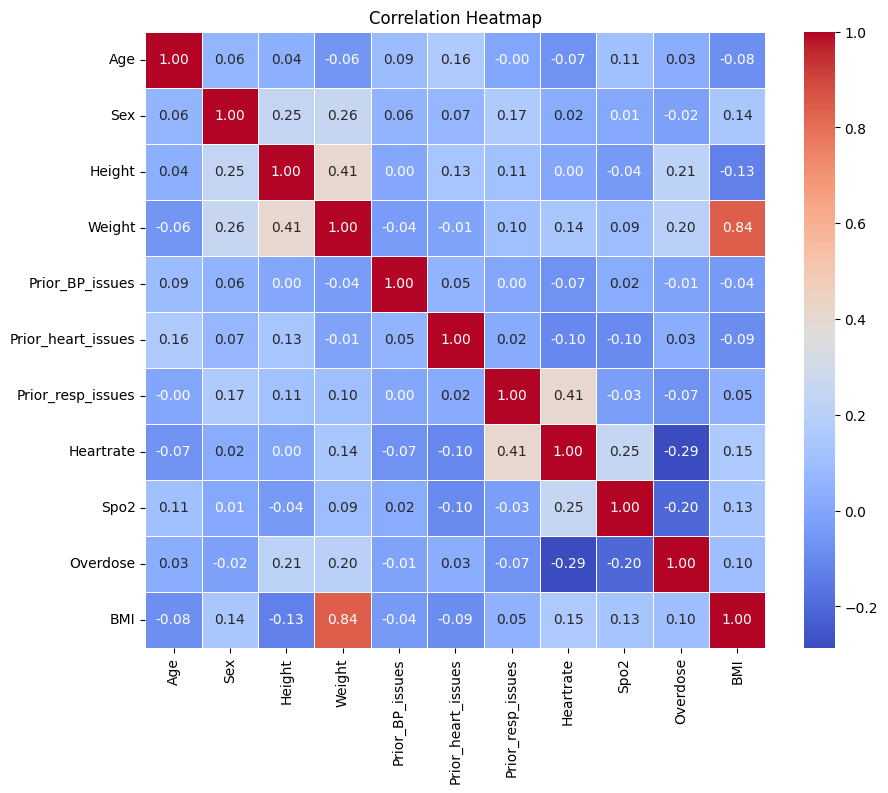

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [12]:
summary_stats = df.describe()
print(summary_stats)

               Age          Sex       Height       Weight  Prior_BP_issues  \
count  4041.000000  4041.000000  4041.000000  4041.000000      4041.000000   
mean     31.025241     0.482554   172.571641    77.466716         0.065825   
std       9.507103     0.499757    11.674330    19.870632         0.248007   
min      20.000000     0.000000   150.000000    46.000000         0.000000   
25%      23.000000     0.000000   163.000000    60.000000         0.000000   
50%      29.000000     0.000000   174.000000    76.000000         0.000000   
75%      37.000000     1.000000   183.000000    94.000000         0.000000   
max      57.000000     1.000000   190.000000   116.000000         1.000000   

       Prior_heart_issues  Prior_resp_issues    Heartrate         Spo2  \
count         4041.000000        4041.000000  4041.000000  4041.000000   
mean             0.180896           0.262559    69.995298    95.739668   
std              0.384979           0.440079    14.201894     3.697408   
m

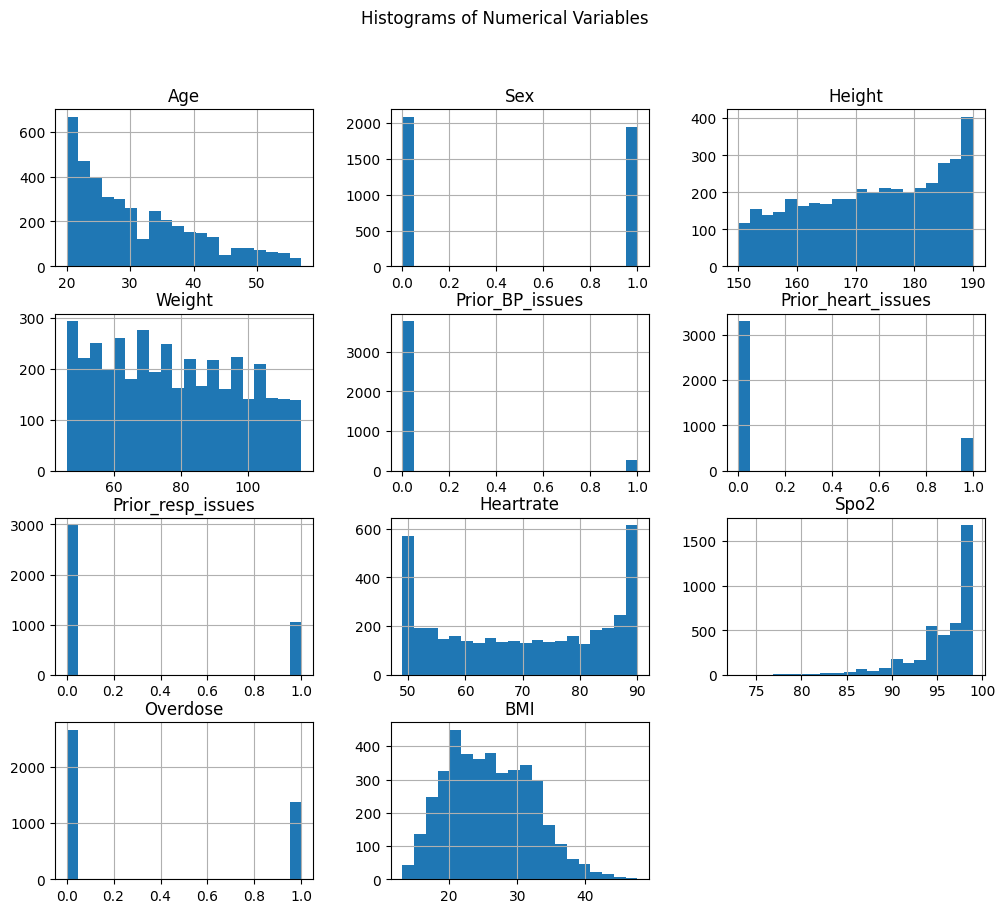

In [13]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Variables")
plt.show()

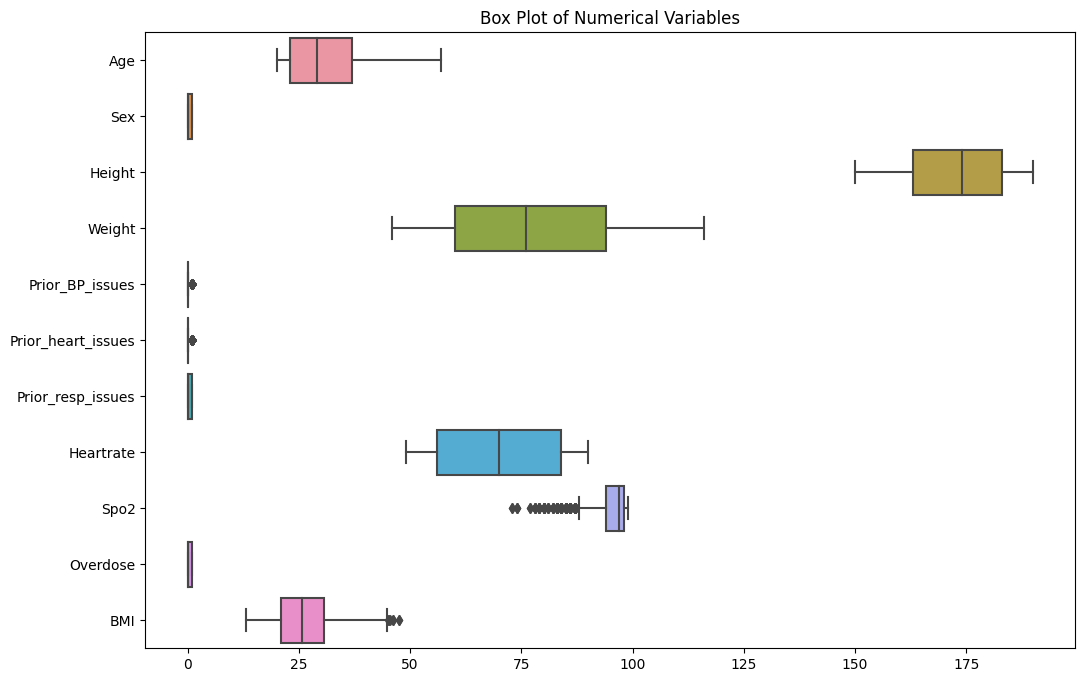

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of Numerical Variables")
plt.show()

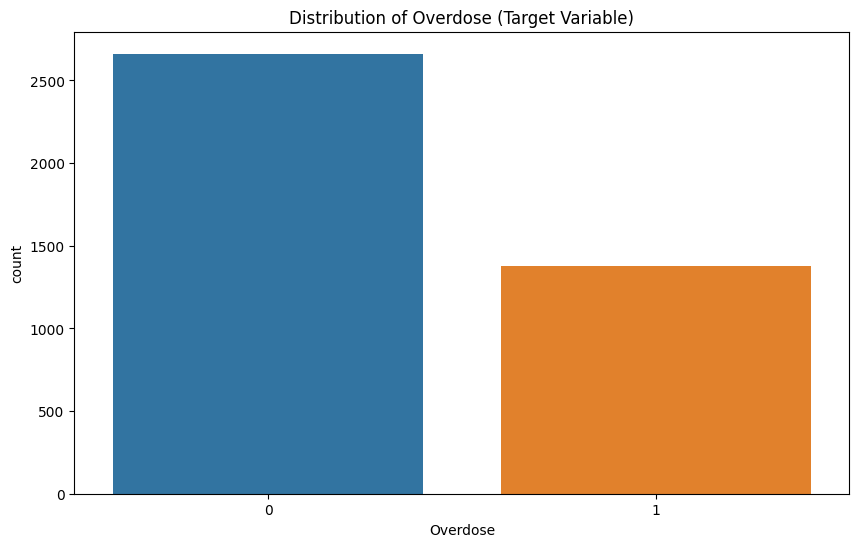

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Overdose', data=df)
plt.title("Distribution of Overdose (Target Variable)")
plt.show()


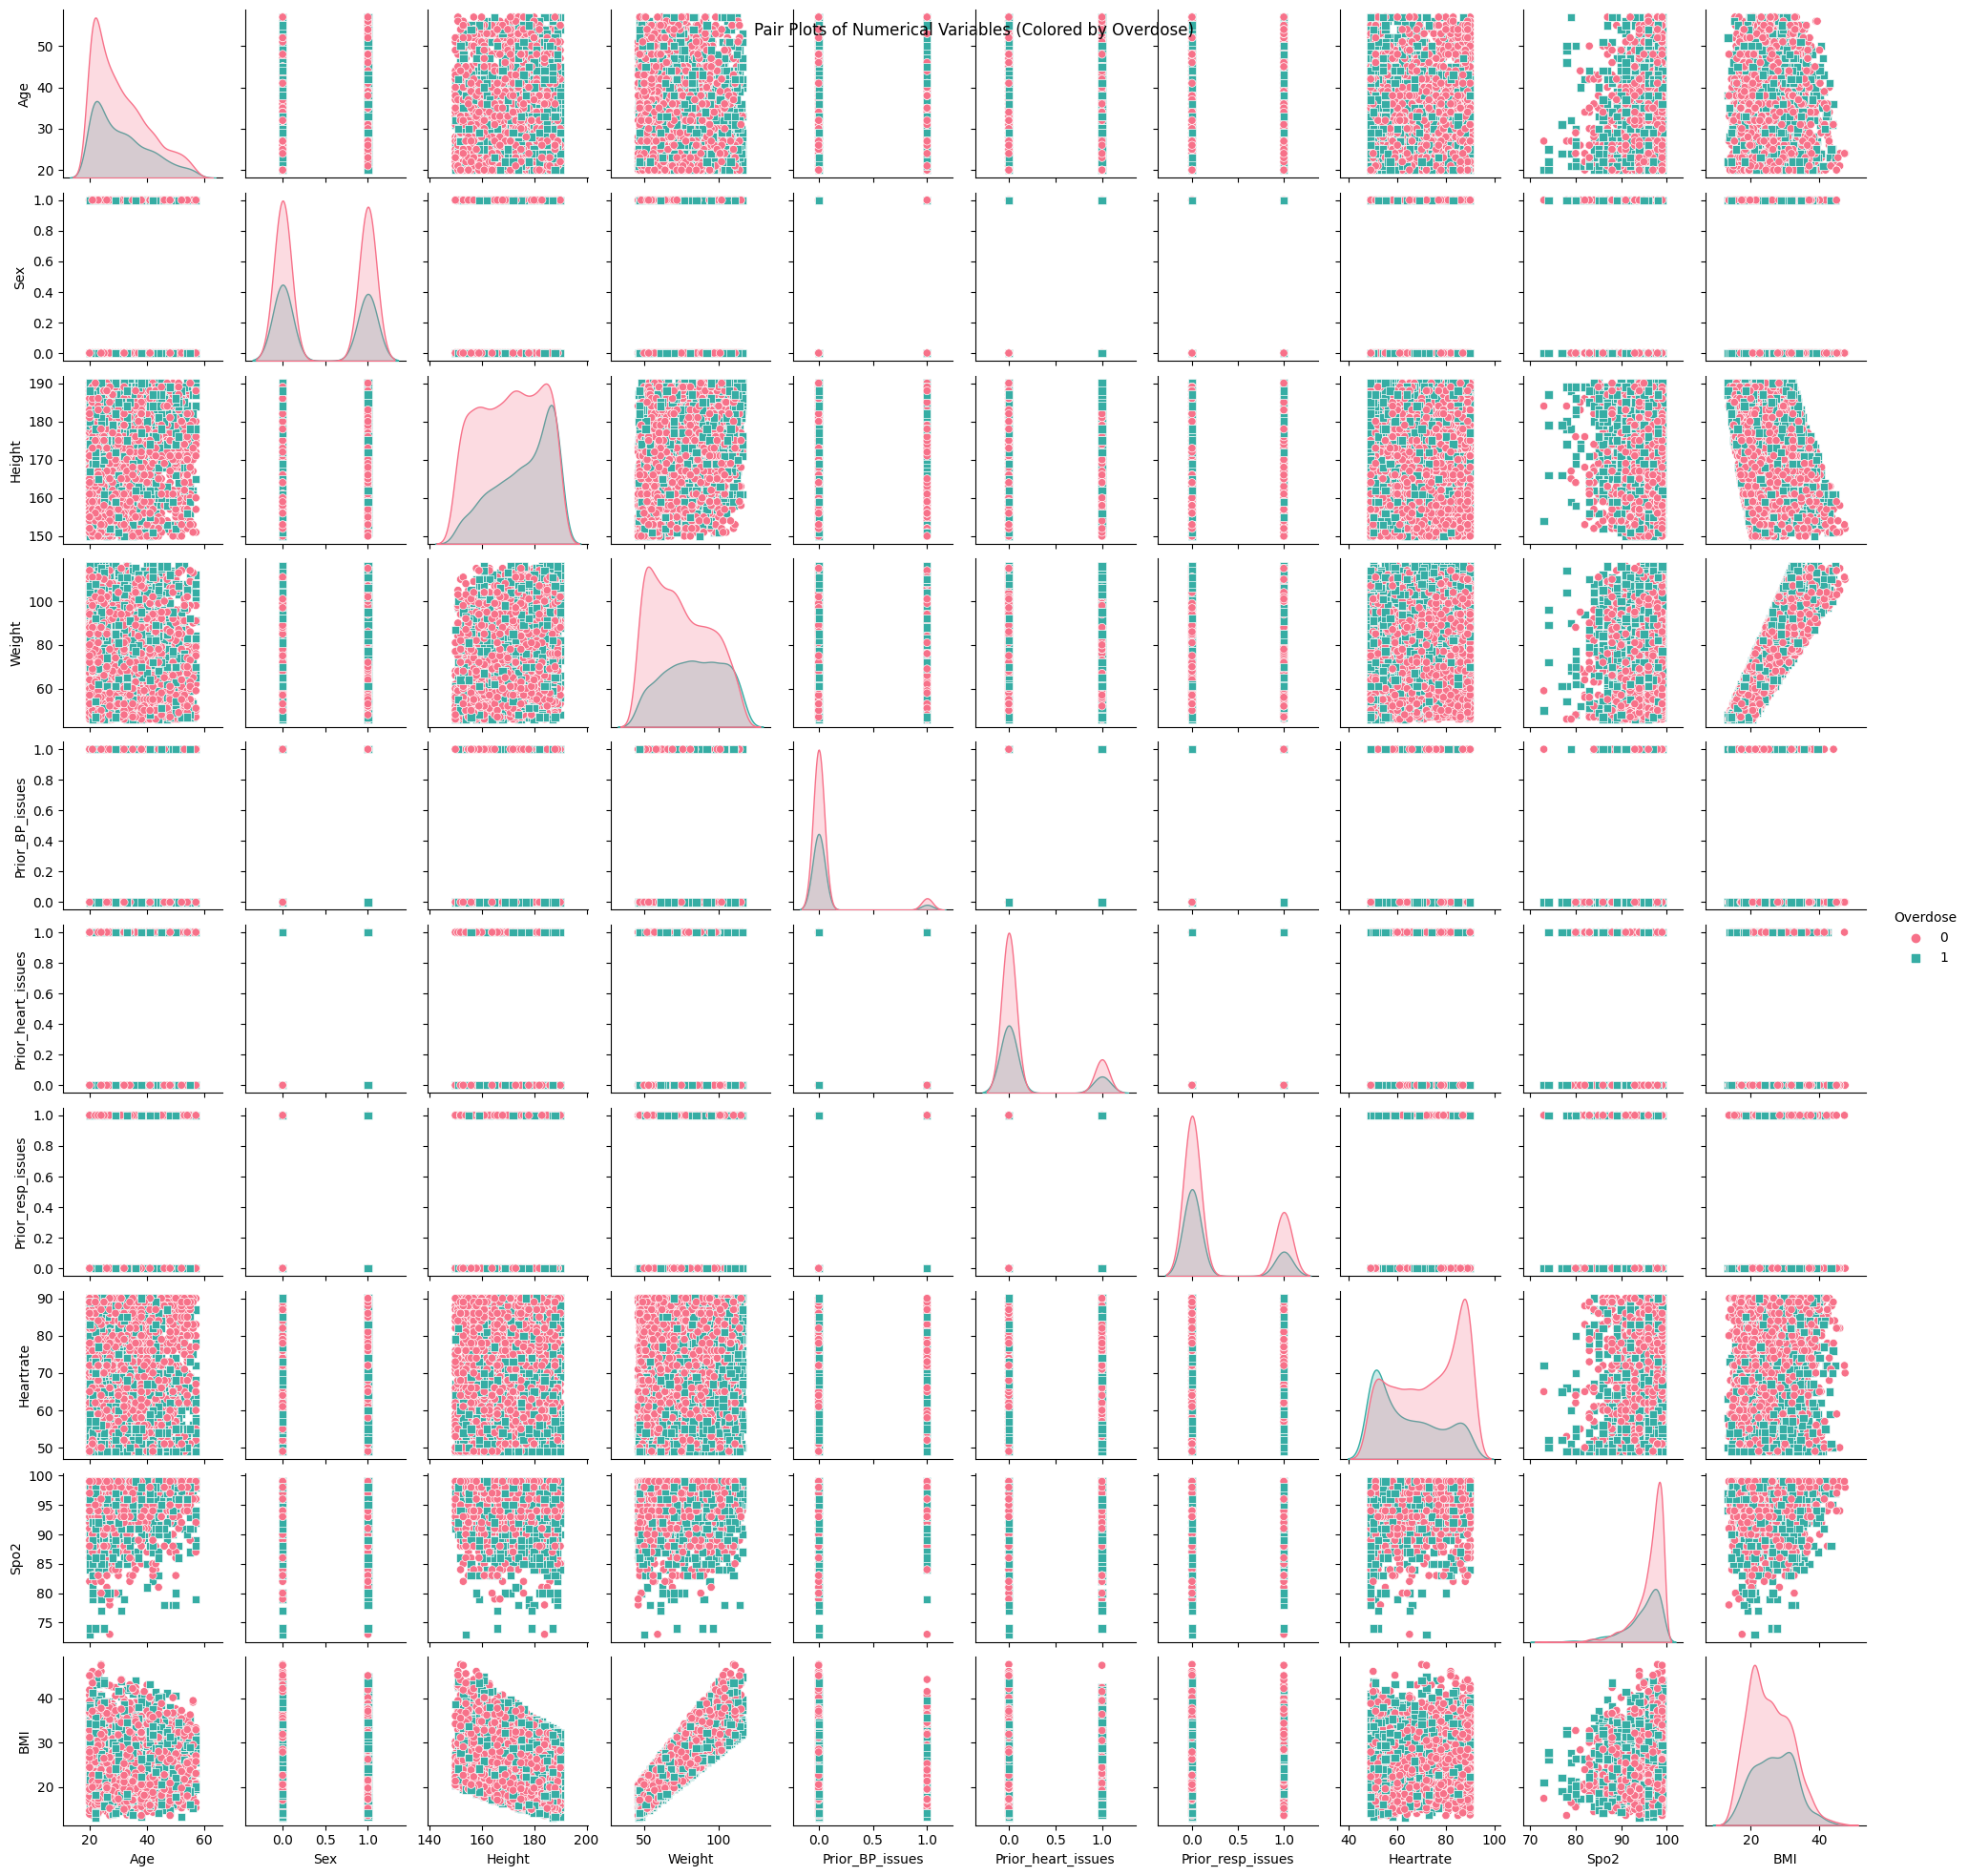

In [16]:
sns.pairplot(df, hue='Overdose', palette='husl', markers=['o', 's'], height=2)
plt.suptitle("Pair Plots of Numerical Variables (Colored by Overdose)")
plt.show()

# **REmoving Outliers**

In [17]:
# Assuming df is your DataFrame
# Calculate the IQR for 'BMI' and 'Spo2'
Q1_bmi = df['BMI'].quantile(0.25)
Q3_bmi = df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

Q1_spo2 = df['Spo2'].quantile(0.25)
Q3_spo2 = df['Spo2'].quantile(0.75)
IQR_spo2 = Q3_spo2 - Q1_spo2

# Define the lower and upper bounds for outlier detection
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

lower_bound_spo2 = Q1_spo2 - 1.5 * IQR_spo2
upper_bound_spo2 = Q3_spo2 + 1.5 * IQR_spo2

# Identify and remove outliers
outliers_bmi = (df['BMI'] < lower_bound_bmi) | (df['BMI'] > upper_bound_bmi)
outliers_spo2 = (df['Spo2'] < lower_bound_spo2) | (df['Spo2'] > upper_bound_spo2)

df_no_outliers = df[~(outliers_bmi | outliers_spo2)]

# Print the shape before and after removing outliers
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)


Shape before removing outliers: (4041, 11)
Shape after removing outliers: (3856, 11)


# **# Creating a Pipeline**

In [18]:
df_no_outliers= df_no_outliers.drop(columns = ['BMI'])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_no_outliers is your DataFrame after handling outliers
# Features (X) and Target variable (y)
X = df_no_outliers.drop('Overdose', axis=1)  # Features
y = df_no_outliers['Overdose']  # Target variable

# Define the numerical columns, categorical columns, and columns to be dropped
numerical_cols = ['Age', 'Height', 'Weight', 'Heartrate', 'Spo2']
categorical_cols = ['Sex',
  'Prior_BP_issues',
  'Prior_heart_issues',
  'Prior_resp_issues']
drop_cols = ['Height', 'Weight']  # Columns to be dropped after calculating BMI

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a custom transformer to calculate BMI
from sklearn.base import BaseEstimator, TransformerMixin

class BMICalculator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Calculate BMI and drop unnecessary columns
        X_copy = X.copy()
        X_copy['BMI'] = X_copy['Weight'] / ((X_copy['Height'] / 100) ** 2)
        X_copy = X_copy.drop(drop_cols, axis=1)
        return X_copy

# Create a ColumnTransformer
bmi_calculator = BMICalculator()

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                le = LabelEncoder()
                output[col] = le.fit_transform(output[col])
        return output

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('bmi_calculator', bmi_calculator, ['Height', 'Weight']),
        ('num_scaler', StandardScaler(), numerical_cols),
        ('label_encoder', MultiColumnLabelEncoder(columns=categorical_cols), categorical_cols)
        
    ],
    remainder='passthrough'  # Pass through the columns not specified
)

# Create a pipeline with preprocessing and a machine learning model (Logistic Regression in this case)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))  # Replace with your desired classifier
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(y_test)
print(y_pred)
print("Accuracy:", accuracy)

1935    1
1307    0
2801    1
2554    0
3219    0
       ..
426     0
3699    0
222     1
2209    0
3015    1
Name: Overdose, Length: 772, dtype: int64
[0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 

/Users/yatingoyal/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


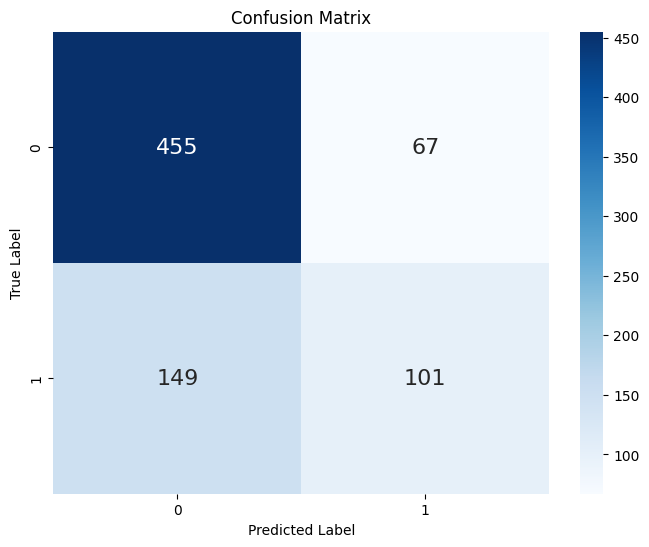

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)


# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

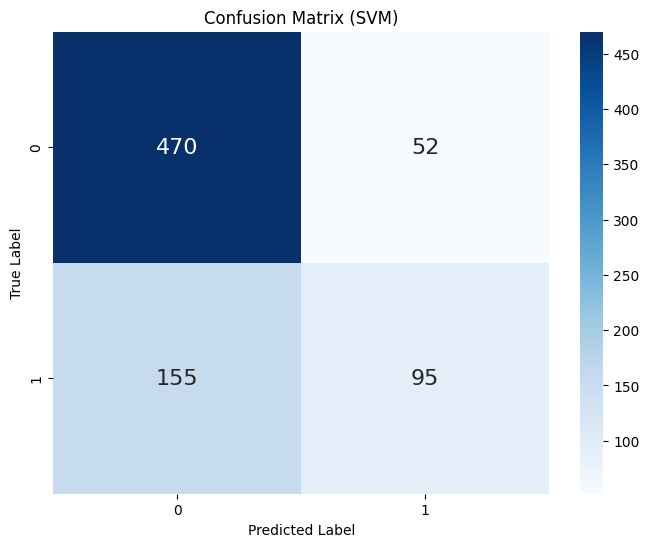

Accuracy (SVM): 0.7318652849740933
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       522
           1       0.65      0.38      0.48       250

    accuracy                           0.73       772
   macro avg       0.70      0.64      0.65       772
weighted avg       0.72      0.73      0.71       772



In [21]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))  # Use 'linear' kernel for simplicity; adjust as needed
])

# Fit the pipeline on the training data
pipeline_svm.fit(X_train, y_train)

# Predictions on the testing set
y_pred_svm = pipeline_svm.predict(X_test)

# Create a confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix using seaborn heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (SVM)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Classification report for SVM
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

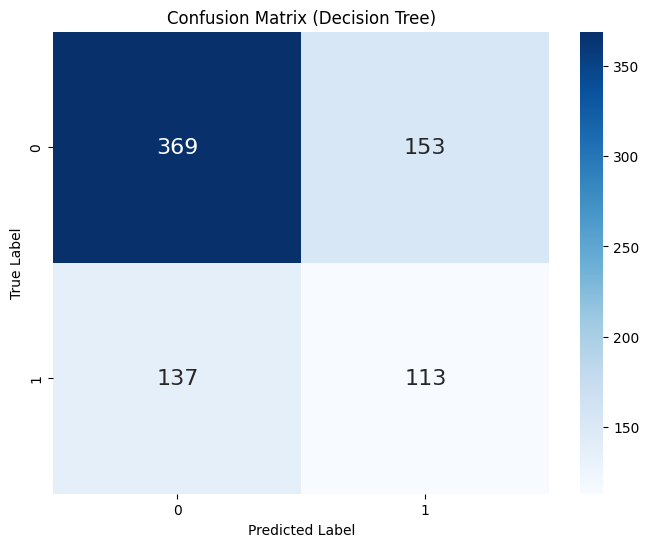

Accuracy (Decision Tree): 0.6243523316062176
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       522
           1       0.42      0.45      0.44       250

    accuracy                           0.62       772
   macro avg       0.58      0.58      0.58       772
weighted avg       0.63      0.62      0.63       772



In [22]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Predictions on the testing set
y_pred_dt = pipeline_dt.predict(X_test)

# Create a confusion matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the confusion matrix using seaborn heatmap for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)

# Classification report for Decision Tree
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

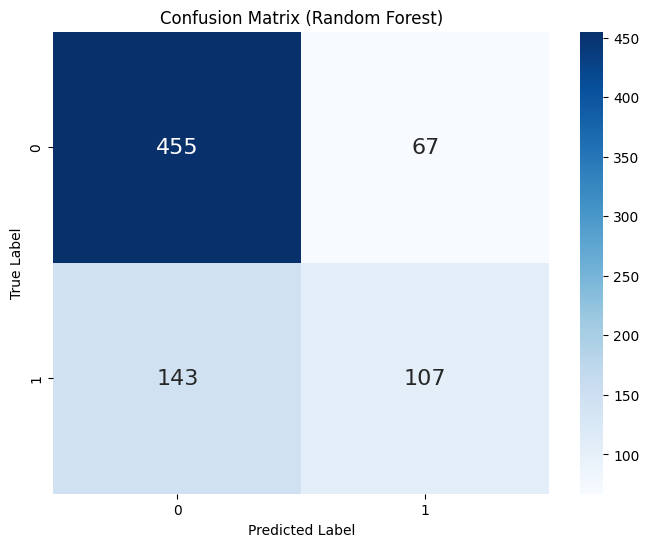

Accuracy (Random Forest): 0.727979274611399
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       522
           1       0.61      0.43      0.50       250

    accuracy                           0.73       772
   macro avg       0.69      0.65      0.66       772
weighted avg       0.71      0.73      0.71       772



In [23]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # You can adjust n_estimators and other parameters
])

# Fit the pipeline on the training data
pipeline_rf.fit(X_train, y_train)

# Predictions on the testing set
y_pred_rf = pipeline_rf.predict(X_test)

# Create a confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix using seaborn heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Classification report for Random Forest
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

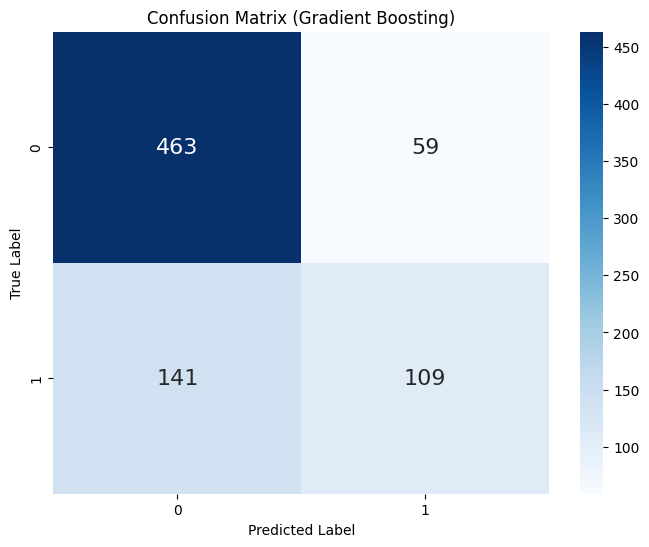

Accuracy (Gradient Boosting): 0.7409326424870466
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       522
           1       0.65      0.44      0.52       250

    accuracy                           0.74       772
   macro avg       0.71      0.66      0.67       772
weighted avg       0.73      0.74      0.72       772



In [24]:
from sklearn.ensemble import GradientBoostingClassifier
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))  # You can adjust n_estimators and other parameters
])

# Fit the pipeline on the training data
pipeline_gb.fit(X_train, y_train)

# Predictions on the testing set
y_pred_gb = pipeline_gb.predict(X_test)

# Create a confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize the confusion matrix using seaborn heatmap for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosting):", accuracy_gb)

# Classification report for Gradient Boosting
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

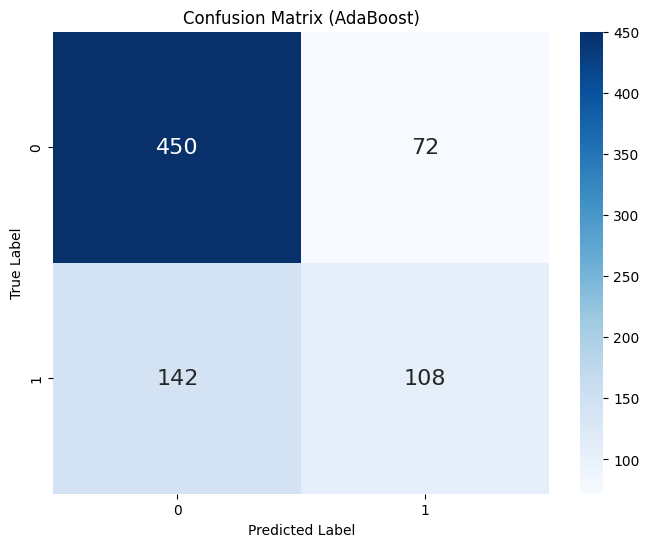

Accuracy (AdaBoost): 0.7227979274611399
Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       522
           1       0.60      0.43      0.50       250

    accuracy                           0.72       772
   macro avg       0.68      0.65      0.66       772
weighted avg       0.71      0.72      0.71       772



In [25]:
from sklearn.ensemble import AdaBoostClassifier
pipeline_ab = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=42))  # You can adjust n_estimators and other parameters
])

# Fit the pipeline on the training data
pipeline_ab.fit(X_train, y_train)

# Predictions on the testing set
y_pred_ab = pipeline_ab.predict(X_test)

# Create a confusion matrix for AdaBoost
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize the confusion matrix using seaborn heatmap for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics for AdaBoost
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy (AdaBoost):", accuracy_ab)

# Classification report for AdaBoost
print("Classification Report (AdaBoost):")
print(classification_report(y_test, y_pred_ab))

/Users/yatingoyal/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

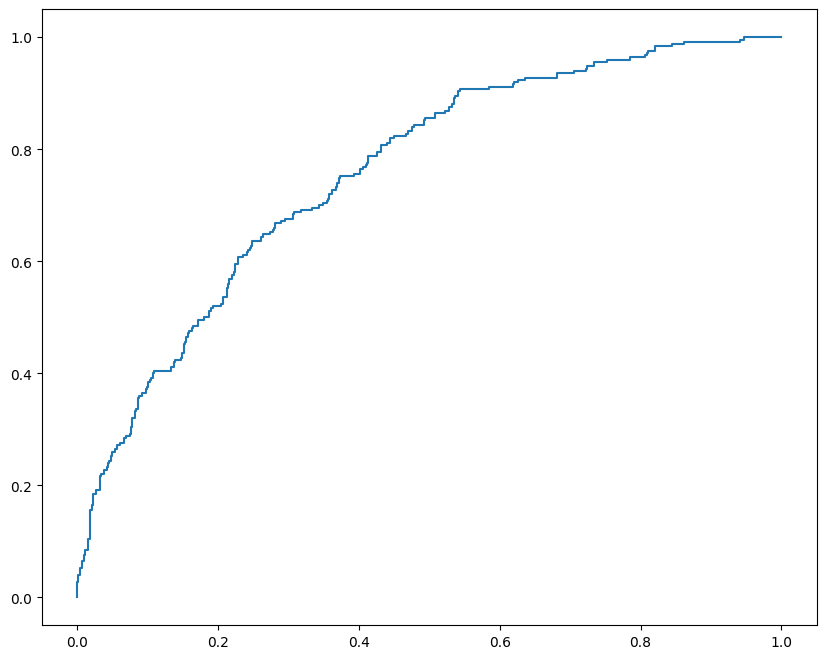

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Assuming df_no_outliers is your DataFrame after handling outliers
# Features (X) and Target variable (y)
X = df_no_outliers.drop('Overdose', axis=1)  # Features
y = df_no_outliers['Overdose']  # Target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X['Prior_BP_issues'] = label_encoder.fit_transform(X['Prior_BP_issues'])
X['Prior_heart_issues'] = label_encoder.fit_transform(X['Prior_heart_issues'])
X['Prior_resp_issues'] = label_encoder.fit_transform(X['Prior_resp_issues'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create classifiers (including Decision Tree and SVM)
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVM', OneVsRestClassifier(SVC(probability=True, random_state=42))),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, random_state=42)),
]

# Binarize the target variable for multiclass classification
y_train_bin = label_binarize(y_train, classes=[0, 1])
y_test_bin = label_binarize(y_test, classes=[0, 1])

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves for each classifier
for name, classifier in classifiers:
    if name in ['Decision Tree', 'SVM']:
        # For Decision Tree and SVM, use decision function
        y_score = classifier.fit(X_train_scaled, y_train_bin).decision_function(X_test_scaled)
    else:
        # For other classifiers, use decision function or predict_proba
        if hasattr(classifier, "decision_function"):
            y_score = classifier.fit(X_train_scaled, y_train_bin).decision_function(X_test_scaled)
        else:
            y_score = classifier.fit(X_train_scaled, y_train_bin).predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
